In [1]:
using PyPlot

┌ Info: Recompiling stale cache file /home/oskar/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


In [2]:
function romberg(f,a,b,n)
    h = (b - a) ./ (2 .^ (0:n-1));
    r = zeros(n,n)
    r[1,1] = (b - a) * (f(a) + f(b)) / 2;#pierwszy trapez
    for j = 2:n
        s = 0;
        for i = 1:2^(j-2)#wykladniczo zwiekszamy ilosc wezlow
            s += f(a + (2 * i - 1) * h[j]);
        end
        r[j,1] = r[j-1,1] / 2 + h[j] * s;
        for k = 2:j#wzor reku na pozostale w wierszu
            r[j,k] = (4^(k-1) * r[j,k-1] - r[j-1,k-1]) / (4^(k-1) - 1);
        end
    end
    return r
end

romberg (generic function with 1 method)

zadanie 5 lista12

In [14]:
function zad5(k, n, h)
    g = 9.81
    X,Y = [], []
    x0, y0, t0, fi = 0,0, 0, 60
    u0, v0 = 100*cosd(fi), 100*sind(fi)
    t,u,v,x,y = y0,u0,v0,x0,y0
    while y>=0
        x += u*h
        y += v*h
        push!(X,x)
        push!(Y,y)
        u_new = u - h*u*k*sqrt(u^2+v^2) #po x
        v_new = v - h*(g+k*sqrt(u^2+v^2)*v) #po y
        u,v = u_new, v_new
    end
    return X,Y  
end

zad5 (generic function with 1 method)

In [52]:
x1, y1 = zad5(0.0001, 100, 0.01);
x2, y2 = zad5(0.0002, 100, 0.01);
x3, y3 = zad5(0.0004, 100, 0.01);
x4, y4 = zad5(0.0006, 100, 0.01);
x5, y5 = zad5(0.0008, 100, 0.01);
x6, y6 = zad5(0.001, 100, 0.01);

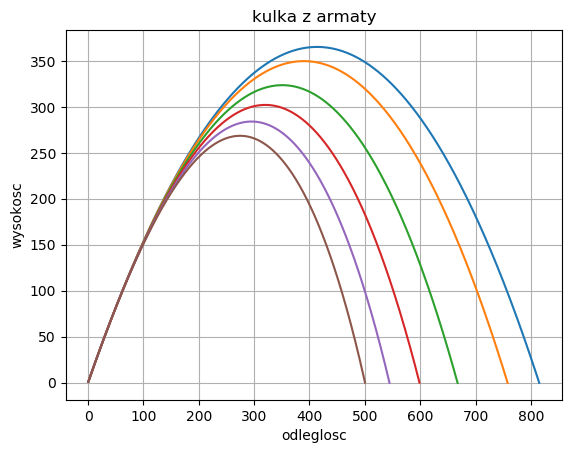

In [53]:
plot(x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6)
title("kulka z armaty")
grid(true)
xlabel("odleglosc")
ylabel("wysokosc")
show()

zadanie 1 lista12

In [9]:

function beta(x)
    if x>= sqrt(3)/2
        return 1/2
    else
        return sqrt(1-x^2)
    end
end

function alfa(x)
    if x>= sqrt(3)/2
        return -1/2
    else
        return -sqrt(1-x^2)
    end
end


alfa (generic function with 1 method)

In [10]:
f(x) = romberg(y -> sin(y)^2/sqrt(1+x^2+y^2), alfa(x),-alfa(x),10)

f (generic function with 1 method)

zadanie1

In [11]:
@time(A = romberg(x -> sin(x)^2*(f(x)[10,10]), -1,3,10))

  0.385202 seconds (702.95 k allocations: 34.683 MiB, 2.92% gc time)


10×10 Array{Float64,2}:
 0.000991039  0.0        0.0        0.0       …  0.0       0.0       0.0     
 0.0771024    0.102473   0.0        0.0          0.0       0.0       0.0     
 0.0674364    0.0642143  0.0616638  0.0          0.0       0.0       0.0     
 0.126617     0.146344   0.15182    0.153251     0.0       0.0       0.0     
 0.131998     0.133792   0.132955   0.132656     0.0       0.0       0.0     
 0.131602     0.131469   0.131314   0.131288  …  0.0       0.0       0.0     
 0.131963     0.132084   0.132124   0.132137     0.0       0.0       0.0     
 0.13202      0.132039   0.132036   0.132034     0.132034  0.0       0.0     
 0.132021     0.132021   0.13202    0.13202      0.13202   0.13202   0.0     
 0.132018     0.132017   0.132017   0.132017     0.132017  0.132017  0.132017

In [54]:
A[10,:]

10-element Array{Float64,1}:
 0.13201810248732798
 0.13201717298713736
 0.1320169014187973 
 0.13201685098362315
 0.13201683930266692
 0.13201683643531764
 0.1320168357216938 
 0.1320168355434872 
 0.132016835498948  
 0.13201683548781395

zadanie6 lista metody RK

In [55]:
#zad6 Rungy Kutta
k1(y) = f.(y)
k2(y) = f.(y + h/2 .* k1)
k3(y) = f.(y + h/2 .* k2)
k4(y) = f.(y + h .* k3)

function zad6(k, n, h)
    g = 9.81
    X,Y = [], []
    x0, y0, t0, fi = 0,0, 0, 60
    u0, v0 = 100*cosd(fi), 100*sind(fi)
    t,u,v,x,y = y0,u0,v0,x0,y0
    while y>=0
        x += u*h
        y += v*h
        push!(X,x)
        push!(Y,y)
        u_new = u - h*u*k*sqrt(u^2+v^2) #po x
        v_new = v - h*(g+k*sqrt(u^2+v^2)*v) #po y
        u,v = u_new, v_new
    end
    return X,Y  
end


zad6 (generic function with 1 method)